In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

piazza_data = pd.read_csv("./lab2data.csv")

In [4]:
piazza_data

,days online,views,contributions,questions,answers,Grade
0,6,24,1,0,1,84.450059
1,68,136,30,0,17,94.660635
2,54,122,2,0,0,80.707490
3,0,0,0,0,0,79.756286
4,41,123,1,1,0,87.501975
5,46,91,12,7,0,94.526755
6,29,87,11,2,5,83.817988
7,32,123,17,11,1,90.846254
8,98,127,50,10,18,98.671115
9,6,31,1,1,0,87.508948


In [5]:
X = piazza_data[["contributions"]].values
y = piazza_data[["Grade"]].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=1693)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

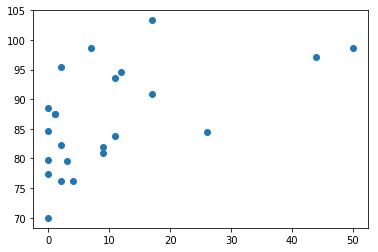

In [17]:
plt.scatter(X_train, y_train)
plt.show()

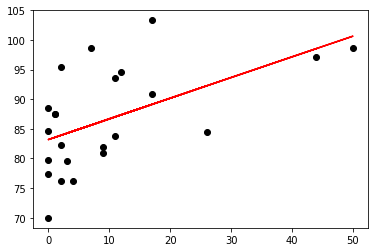

In [19]:
plt.scatter(X_train, y_train, color = "black")
plt.plot(X_train, regression.predict(X_train), color = "red")
plt.show()

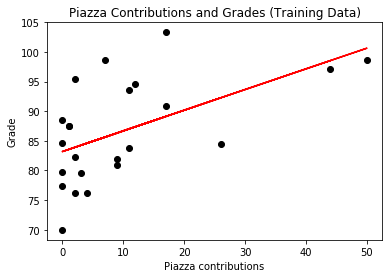

In [20]:
plt.scatter(X_train, y_train, color = "black")
plt.plot(X_train, regression.predict(X_train), color = "red")
plt.title("Piazza Contributions and Grades (Training Data)")
plt.xlabel("Piazza contributions")
plt.ylabel("Grade")
plt.show()

In [21]:
y_predictions = regression.predict(X_test)
y_predictions

array([[ 88.42281244],
       [ 83.19116839],
       [ 83.19116839],
       [ 84.58627347],
       [ 86.33015482],
       [ 83.53994466],
       [ 93.6544565 ],
       [ 83.88872093]])

In [22]:
[y_test, y_predictions]

[array([[ 85.3619999 ],
        [ 65.80813036],
        [ 79.87962424],
        [ 86.59306021],
        [ 90.08245761],
        [ 84.45005886],
        [ 94.66063545],
        [ 80.70749047]]), array([[ 88.42281244],
        [ 83.19116839],
        [ 83.19116839],
        [ 84.58627347],
        [ 86.33015482],
        [ 83.53994466],
        [ 93.6544565 ],
        [ 83.88872093]])]

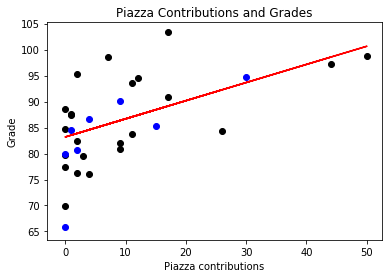

In [27]:
plt.scatter(X_train, y_train, color = "black")
plt.scatter(X_test, y_test, color = "blue")
plt.plot(X_train, regression.predict(X_train), color = "red")
plt.title("Piazza Contributions and Grades")
plt.xlabel("Piazza contributions")
plt.ylabel("Grade")
plt.show()

In [28]:
X = piazza_data[["contributions", "days online", "views", "questions", "answers"]].values
y = piazza_data["Grade"].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 1693)

In [48]:
scale_X = StandardScaler()
X_train_scaled = scale_X.fit_transform(X_train)
X_test_scaled = scale_X.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [49]:
multiple_regression = LinearRegression()
multiple_regression.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
y_predictions = multiple_regression.predict(X_test_scaled)

In [51]:
[y_test, y_predictions]

[array([ 85.3619999 ,  65.80813036,  79.87962424,  86.59306021,
         90.08245761,  84.45005886,  94.66063545,  80.70749047]),
 array([ 92.00457807,  76.83085344,  83.28645335,  85.13809364,
         92.00125779,  78.70692855,  91.79514715,  88.66683579])]

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
X = piazza_data[["contributions", "days online", "views", "questions", "answers"]].values
y = piazza_data["Grade"].values

In [55]:
poly_data = PolynomialFeatures(degree = 2)

X_poly = poly_data.fit_transform(X)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.25, random_state = 1693)

In [57]:
poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
y_predictions = poly_reg.predict(X_test)

In [59]:
y_predictions

array([ 129.99061298,   78.49434438,   79.54514783,  100.30428982,
         39.96292796,   97.39924577,  -76.61352846,  156.61096895])

In [62]:
X = piazza_data[["contributions"]].values
y = piazza_data[["Grade"]].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=1693)

scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [63]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

poly_data = PolynomialFeatures(degree=2)
poly_reg.fit(poly_data.fit_transform(X_train), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

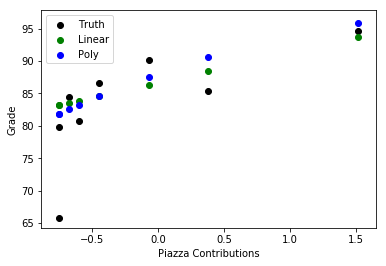

In [65]:
plt.scatter(X_test, y_test, color = "black", label = "Truth")
plt.scatter(X_test, lin_reg.predict(X_test), color = "green", label = "Linear")
plt.scatter(X_test, poly_reg.predict(poly_data.fit_transform(X_test)),color = "blue", label = "Poly")
plt.xlabel("Piazza Contributions")
plt.ylabel("Grade")
plt.legend()
plt.show()